## 1. 유튜브 동영상 리스트 및 스크립트 가져오기

In [1]:
# 유튜브 동영상 리스트 가져올 라이브러리 호출
import pytube
import pandas as pd

In [2]:
# CNBC Tech check 동영상 리스트
playlist_urls = ["https://www.youtube.com/playlist?list=PLVbP054jv0KrekfBcyrotBUDqduDScwJS"]#재생목록 url들

In [3]:
# 비어있는 LIST 형태 만들기
descs = []
authors = []
titles = []
years = []
months = []
days = []
views = []
ids = []
links = []

In [4]:
# 동영상 리스트 For문 활용해서 업로드하기
for url in playlist_urls:
    print(url)
    playlist = pytube.Playlist(url)
    i = 1
    
    for video in playlist.videos:
        if (i % 100 == 1):
            print(i,"st video")
        
        try:
            descs.append(video.description)
            authors.append(video.author)
            titles.append(video.title)
            try:
                video.publish_date.year
                video.publish_date.month
                video.publish_date.day
                years.append(video.publish_date.year)
                months.append(video.publish_date.month)
                days.append(video.publish_date.day)
            except:
                years.append(-1)
                months.append(-1)
                days.append(-1)
            views.append(video.views)
            ids.append(video.video_id)
            links.append(video.watch_url)
        except:
            print("Error occured : get information failed\ni:",i,video.title)
        i += 1

https://www.youtube.com/playlist?list=PLVbP054jv0KrekfBcyrotBUDqduDScwJS
1 st video


In [5]:
df = pd.DataFrame(columns=['id', 'title', 'author', 'description', 'pub_year', 'pub_month', 'pub_day', 'views', 'link'])
df["id"] = ids
df["title"] = titles
df["author"] = authors
df["description"] = descs
df["pub_year"] = years
df["pub_month"] = months
df["pub_day"] = days
df["views"] = views
df["link"] = links

In [6]:
df #64개 데이터 생성

,id,title,author,description,pub_year,pub_month,pub_day,views,link
0,hYjezxYm-yQ,TechCheck+ with 'She-Hulk' showrunner Jessica ...,CNBC Television,"On the latest episode of “Binge,” CNBC's Carl ...",2022,9,23,3017,https://youtube.com/watch?v=hYjezxYm-yQ
1,O3QiQRjewOk,CNBC TechCheck+ with celebrity chef Tom Colicc...,CNBC Television,CNBC’s Julia Boorstin is joined by celebrity c...,2022,9,22,4017,https://youtube.com/watch?v=O3QiQRjewOk
2,nuauQ6rpZIg,LIVE: TechCheck+ with 'Dopesick' Creator Danny...,CNBC Television,CNBC's Carl Quintanilla brings on Danny Strong...,2022,9,2,993,https://youtube.com/watch?v=nuauQ6rpZIg
3,WL0tHENp9rU,TechCheck+ with HBO's 'Industry' creators on t...,CNBC Television,In our latest episode of our digital interview...,2022,8,19,3705,https://youtube.com/watch?v=WL0tHENp9rU
4,dxsJdpctL9I,FedEx Office president and CEO on autonomous r...,CNBC Television,CNBC’s Frank Holland chats with FedEx Office p...,2022,8,9,4210,https://youtube.com/watch?v=dxsJdpctL9I
...,...,...,...,...,...,...,...,...,...
59,UiIrBhot2p8,LIVE: TechCheck with Miami Mayor Francis Suare...,CNBC Television,TechCheck’s Deirdre Bosa speaks with General C...,2021,5,17,2374,https://youtube.com/watch?v=UiIrBhot2p8
60,8U-26t8UWww,TechCheck’s Deirdre Bosa with Michael Sonnensh...,CNBC Television,"17% drop. Elon Musk turns on Bitcoin, citing t...",2021,5,13,9815,https://youtube.com/watch?v=8U-26t8UWww
61,WX6Pc-YiEsY,CNBC TechCheck's Deirdre Bosa chats with Zynga...,CNBC Television,CNBC TechCheck’s Deirdre Bosa chats with Zynga...,2021,5,6,4142,https://youtube.com/watch?v=WX6Pc-YiEsY
62,gA8nGKQmN9M,Oscars Over the Top: TechCheck talks Hollywood...,CNBC Television,Senior Media & Entertainment Reporter Julia Bo...,2021,4,22,3246,https://youtube.com/watch?v=gA8nGKQmN9M


In [7]:
# 날짜 변환을 위해서 int형을 string형식으로 변환
df['pub_year'] = df['pub_year'].astype(str)

In [8]:
df['pub_month'] = df['pub_month'].astype(str)

In [9]:
# lambda 는 한줄에 def처럼 함수 형태로 사용하기 위해서 쓰는 것, 
# apply는 열기준으로 데이터 적용, 
# zfill함수는 9를 09로 변환해주는 0 채우는 함수
df['pub_month'] = df['pub_month'].apply(lambda x: str(x).zfill(2))

In [10]:
df['pub_day'] = df['pub_day'].astype(str)

In [11]:
df['pub_day'] = df['pub_day'].apply(lambda x: str(x).zfill(2))

In [12]:
# string 형식으로 변환 후 yyyy-mm-dd 형식으로 변환, string형태는 '+'를 쓰면 옆에 추가가 됨
# ex) 2012 + 09 + 20, String형태면 20120920 으로 반환하지만, int형태면 값은 2041이 나옴
df['Date'] = df['pub_year']+'-'+df['pub_month']+'-'+df['pub_day']

In [13]:
# String형태는 object형이기 때문에 날짜 형식으로 변경이 필요하며, 향후 가격 데이터와 헙칠 예정이며, merge를 통해 join 
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Date가 날짜형식으로 되어있는지 확인위해서 info함수 사용
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           64 non-null     object        
 1   title        64 non-null     object        
 2   author       64 non-null     object        
 3   description  64 non-null     object        
 4   pub_year     64 non-null     object        
 5   pub_month    64 non-null     object        
 6   pub_day      64 non-null     object        
 7   views        64 non-null     int64         
 8   link         64 non-null     object        
 9   Date         64 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 5.1+ KB


In [15]:
# Youtube Script 가져오는 라이브러리 호출
from youtube_transcript_api import YouTubeTranscriptApi

In [16]:
# 스크립트 가져오는 For문
# ID 하나당 하나의 스크립트에 스크립트가 여러개 있는 형식

trs = []  #비어있는 LIST 만들기, 전체스크립트용

for i in ids:  #유튜브 id 하나씩 가져오기
    
    outls = [] #비어있는 LIST 만들기, get_transcript에서 영어, id기준으로 가져오기, 한개의 스트립트용
    
    try:
        tx = YouTubeTranscriptApi.get_transcript( i, languages=['en'] )
    
        for j in tx: #id별 스크립트 하나씩 가져오기
            outtxt = (j['text']) #['text'] 컬럼만 가져오기
            outls.append(outtxt)
    
    except:
        outls.append('1') #비어있는 스크립트에 1넣기
        #pass
    
    trs.append(outls)

In [17]:
# 유튜브 스크립트를 담을 비어있는 DataFrame만들기
df3 = pd.DataFrame(columns = ['id', 'script'])

In [18]:
# 컬럼에, id와 스크립트 담기
df3['id'] = ids 
df3['script'] = trs

In [19]:
df3.head(5) #상위 5개만 가져와보기

,id,script
0,hYjezxYm-yQ,"[foreign, us today on binge Jessica GAO head, ..."
1,O3QiQRjewOk,"[foreign, hello everyone and welcome to Tech c..."
2,nuauQ6rpZIg,"[[Music], joining us today danny strong creato..."
3,WL0tHENp9rU,"[mickey down and conrad kaye industry, co-crea..."
4,dxsJdpctL9I,"[world, book unforgettable travel experiences,..."


In [20]:
# df(동영상 리스트) 와 df3(스크립트 리스트)를 id기준으로 합치기
dfm = pd.merge(df, df3, left_on = 'id', right_on = 'id') 

In [21]:
dfm.head(5) #상위 5개만 가져와보기

,id,title,author,description,pub_year,pub_month,pub_day,views,link,Date,script
0,hYjezxYm-yQ,TechCheck+ with 'She-Hulk' showrunner Jessica ...,CNBC Television,"On the latest episode of “Binge,” CNBC's Carl ...",2022,09,23,3017,https://youtube.com/watch?v=hYjezxYm-yQ,2022-09-23,"[foreign, us today on binge Jessica GAO head, ..."
1,O3QiQRjewOk,CNBC TechCheck+ with celebrity chef Tom Colicc...,CNBC Television,CNBC’s Julia Boorstin is joined by celebrity c...,2022,09,22,4017,https://youtube.com/watch?v=O3QiQRjewOk,2022-09-22,"[foreign, hello everyone and welcome to Tech c..."
2,nuauQ6rpZIg,LIVE: TechCheck+ with 'Dopesick' Creator Danny...,CNBC Television,CNBC's Carl Quintanilla brings on Danny Strong...,2022,09,02,993,https://youtube.com/watch?v=nuauQ6rpZIg,2022-09-02,"[[Music], joining us today danny strong creato..."
3,WL0tHENp9rU,TechCheck+ with HBO's 'Industry' creators on t...,CNBC Television,In our latest episode of our digital interview...,2022,08,19,3705,https://youtube.com/watch?v=WL0tHENp9rU,2022-08-19,"[mickey down and conrad kaye industry, co-crea..."
4,dxsJdpctL9I,FedEx Office president and CEO on autonomous r...,CNBC Television,CNBC’s Frank Holland chats with FedEx Office p...,2022,08,09,4210,https://youtube.com/watch?v=dxsJdpctL9I,2022-08-09,"[world, book unforgettable travel experiences,..."


In [22]:
# 스크립트가 없는 행의 index를 가져오기, length = 1, 64개에서는 스크립트가 없는 동영상이 다행히 없음
index1 = dfm[dfm['script'].map(len) == 1].index

In [23]:
index1

Int64Index([], dtype='int64')

In [24]:
# 스크립트가 없는 행 삭제
dfm = dfm.drop(index = index1)

In [25]:
# 스크립트에서 단어들의 반복 숫자 가져오는 라이브러리 호출
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [26]:
# 단어들 반복숫자 가져오는 함수
def vector(voca):
    
    vectorizer.fit(voca)
    vec = vectorizer.vocabulary_
    
    return vec

In [27]:
# Apply함수를 사용해서, 'vec'를 추가하여, 단어들 반복 숫자 가져오는 내용 넣기
dfm['vec'] = dfm['script'].apply(vector)

In [28]:
dfm['vec']

0     {'foreign': 249, 'us': 672, 'today': 647, 'on'...
1     {'foreign': 229, 'hello': 274, 'everyone': 187...
2     {'music': 344, 'joining': 280, 'us': 567, 'tod...
3     {'mickey': 393, 'down': 182, 'and': 30, 'conra...
4     {'world': 650, 'book': 71, 'unforgettable': 59...
                            ...                        
59    {'music': 420, 'hi': 301, 'everybody': 201, 'w...
60    {'hi': 282, 'everyone': 210, 'welcome': 642, '...
61    {'hi': 329, 'everyone': 228, 'frank': 271, 'th...
62    {'dominate': 436, 'oscar': 1083, 'nominations'...
63    {'all': 26, 'right': 440, 'well': 592, 'uh': 5...
Name: vec, Length: 64, dtype: object

In [29]:
dfm.head(5) #dfm 상위 5개 확인

,id,title,author,description,pub_year,pub_month,pub_day,views,link,Date,script,vec
0,hYjezxYm-yQ,TechCheck+ with 'She-Hulk' showrunner Jessica ...,CNBC Television,"On the latest episode of “Binge,” CNBC's Carl ...",2022,09,23,3017,https://youtube.com/watch?v=hYjezxYm-yQ,2022-09-23,"[foreign, us today on binge Jessica GAO head, ...","{'foreign': 249, 'us': 672, 'today': 647, 'on'..."
1,O3QiQRjewOk,CNBC TechCheck+ with celebrity chef Tom Colicc...,CNBC Television,CNBC’s Julia Boorstin is joined by celebrity c...,2022,09,22,4017,https://youtube.com/watch?v=O3QiQRjewOk,2022-09-22,"[foreign, hello everyone and welcome to Tech c...","{'foreign': 229, 'hello': 274, 'everyone': 187..."
2,nuauQ6rpZIg,LIVE: TechCheck+ with 'Dopesick' Creator Danny...,CNBC Television,CNBC's Carl Quintanilla brings on Danny Strong...,2022,09,02,993,https://youtube.com/watch?v=nuauQ6rpZIg,2022-09-02,"[[Music], joining us today danny strong creato...","{'music': 344, 'joining': 280, 'us': 567, 'tod..."
3,WL0tHENp9rU,TechCheck+ with HBO's 'Industry' creators on t...,CNBC Television,In our latest episode of our digital interview...,2022,08,19,3705,https://youtube.com/watch?v=WL0tHENp9rU,2022-08-19,"[mickey down and conrad kaye industry, co-crea...","{'mickey': 393, 'down': 182, 'and': 30, 'conra..."
4,dxsJdpctL9I,FedEx Office president and CEO on autonomous r...,CNBC Television,CNBC’s Frank Holland chats with FedEx Office p...,2022,08,09,4210,https://youtube.com/watch?v=dxsJdpctL9I,2022-08-09,"[world, book unforgettable travel experiences,...","{'world': 650, 'book': 71, 'unforgettable': 59..."


In [30]:
# [[]] => 데이터안에 있는 LIST형식의 데이터를 String형식으로 변환하는 함수
def list_str(sentence):
    str2 = ''.join(sentence)
    return str2

In [31]:
# 스크립트 컬럼에 있는 내용을 LIST형식에서 String형식으로 list_str함수를 사용해서 변환
dfm['sentence'] = dfm['script'].apply(list_str)

In [32]:
# #LIST에서 String형식으로, 대문자를 소문자로 전부 변경하고 띄어쓰기 없애기, 
# 이유: 나중에 find함수를 통해서 종목명 확인할때 편하게 하기 위해서
dfm['vec_sentence'] = dfm['vec'].apply(list_str) 

In [33]:
# 제대로 변환됐는지 상위 5개 데이터만 확인
dfm.head(5)

,id,title,author,description,pub_year,pub_month,pub_day,views,link,Date,script,vec,sentence,vec_sentence
0,hYjezxYm-yQ,TechCheck+ with 'She-Hulk' showrunner Jessica ...,CNBC Television,"On the latest episode of “Binge,” CNBC's Carl ...",2022,09,23,3017,https://youtube.com/watch?v=hYjezxYm-yQ,2022-09-23,"[foreign, us today on binge Jessica GAO head, ...","{'foreign': 249, 'us': 672, 'today': 647, 'on'...",foreignus today on binge Jessica GAO headwrite...,foreignustodayonbingejessicagaoheadwriterexecu...
1,O3QiQRjewOk,CNBC TechCheck+ with celebrity chef Tom Colicc...,CNBC Television,CNBC’s Julia Boorstin is joined by celebrity c...,2022,09,22,4017,https://youtube.com/watch?v=O3QiQRjewOk,2022-09-22,"[foreign, hello everyone and welcome to Tech c...","{'foreign': 229, 'hello': 274, 'everyone': 187...",foreignhello everyone and welcome to Tech chec...,foreignhelloeveryoneandwelcometotechcheckclass...
2,nuauQ6rpZIg,LIVE: TechCheck+ with 'Dopesick' Creator Danny...,CNBC Television,CNBC's Carl Quintanilla brings on Danny Strong...,2022,09,02,993,https://youtube.com/watch?v=nuauQ6rpZIg,2022-09-02,"[[Music], joining us today danny strong creato...","{'music': 344, 'joining': 280, 'us': 567, 'tod...",[Music]joining us today danny strong creatorwr...,musicjoiningustodaydannystrongcreatorwriterand...
3,WL0tHENp9rU,TechCheck+ with HBO's 'Industry' creators on t...,CNBC Television,In our latest episode of our digital interview...,2022,08,19,3705,https://youtube.com/watch?v=WL0tHENp9rU,2022-08-19,"[mickey down and conrad kaye industry, co-crea...","{'mickey': 393, 'down': 182, 'and': 30, 'conra...",mickey down and conrad kaye industryco-creator...,mickeydownandconradkayeindustrycocreatorsshowr...
4,dxsJdpctL9I,FedEx Office president and CEO on autonomous r...,CNBC Television,CNBC’s Frank Holland chats with FedEx Office p...,2022,08,09,4210,https://youtube.com/watch?v=dxsJdpctL9I,2022-08-09,"[world, book unforgettable travel experiences,...","{'world': 650, 'book': 71, 'unforgettable': 59...",worldbook unforgettable travel experiencesoh h...,worldbookunforgettabletravelexperiencesohheyev...


## 여기까지가 dfm완성스크립트를 띄어쓰기 없애고 소문자로 변경한 부분

## 2. 주식 가격 , 수익률 가져오기

In [ ]:
# 밑에 라이브러리가 에러 날경우 아래 실행을 통해서 설치할 것!
#!pip install finance-datareader
#!pip install pandas-datareader

In [34]:
import FinanceDataReader as fdr
import pandas as pd
import statsmodels.api as smf
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff

In [35]:
# 나스닥 데이터 상위 시총 10개만 가져오기
stk_list = fdr.StockListing('NASDAQ').head(10)

100%|██████████| 4606/4606 [00:13<00:00, 349.06it/s]


In [36]:
# 상위 시총 10개 확인: 애플, 아마존, 테슬라, 구글, 메타, 엔비디아, 펩시코, 코스트코
stk_list

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,TSLA,Tesla Inc,자동차 및 자동차 부품,531010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
5,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
6,META,Meta Platforms Inc Class A,소프트웨어 및 IT서비스,572010
7,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010
8,PEP,PepsiCo Inc,음료,541010
9,COST,Costco Wholesale Corp,다양한 소매업,534020


In [37]:
# 아마존을 제외하고, 회사명이 가장 앞에 있는 단어이므로 띄어쓰기로 분리한후, 'cnnm'컬럼으로 저장
stk_list['cnnm'] = stk_list['Name'].str.split(' ')

In [38]:
# 띄어쓰기중 가장 앞에 있는 단어가 회사명이므로, 첫번째 것만 가져오기 => str[0] 파이썬은 첫번째가 0번부터 시작하므로 0번째를 호출
stk_list['cmpy_nm'] = stk_list['cnnm'].str[0]

In [39]:
stk_list

,Symbol,Name,Industry,IndustryCode,cnnm,cmpy_nm
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060,"[Apple, Inc]",Apple
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010,"[Microsoft, Corp]",Microsoft
2,AMZN,Amazon.com Inc,다양한 소매업,534020,"[Amazon.com, Inc]",Amazon.com
3,TSLA,Tesla Inc,자동차 및 자동차 부품,531010,"[Tesla, Inc]",Tesla
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010,"[Alphabet, Inc, Class, A]",Alphabet
5,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010,"[Alphabet, Inc, Class, C]",Alphabet
6,META,Meta Platforms Inc Class A,소프트웨어 및 IT서비스,572010,"[Meta, Platforms, Inc, Class, A]",Meta
7,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010,"[NVIDIA, Corp]",NVIDIA
8,PEP,PepsiCo Inc,음료,541010,"[PepsiCo, Inc]",PepsiCo
9,COST,Costco Wholesale Corp,다양한 소매업,534020,"[Costco, Wholesale, Corp]",Costco


In [40]:
# Ticker들만 따로 LIST로 저장하고, 이를 가격데이터에서 가져올 예정 => 가격데이터의 Ticker를 활용하여 날짜별 가격을 가져오기 위해서 하는 내용
symbol = stk_list['Symbol'].to_list()
symbol

['AAPL',
 'MSFT',
 'AMZN',
 'TSLA',
 'GOOGL',
 'GOOG',
 'META',
 'NVDA',
 'PEP',
 'COST']

In [41]:
#나스닥 종목들 가격 데이터 가져오기(전체), 전체 데이터에서 join을 통해 위의 시총 상위 10개종목에 대한 데이터를 가져오기 위해 저장하는 부분
df_nasdaq = fdr.StockListing('NASDAQ').iloc[:, :2]

100%|██████████| 4606/4606 [00:11<00:00, 391.48it/s]


In [42]:
# 유튜브 동영상이 가장 오래된날짜가 21년 1월 1일, 가장 최근날짜가 22년 9월 26일
df2 = pd.DataFrame() # 비어있는 DataFrame 생성
for j in symbol:
    
    # get_data_yahoo() 메쏘드, j => Ticker, ex) AAPL, MSFT, AMZN and so on, interval D=> Day
    df4 = web.get_data_yahoo(j, start='2021-01-01',end='2022-09-26',interval='d') 
    df4['Symbol'] = j
    df2 = pd.concat([df2, df4])
    
df2.reset_index().merge(df_nasdaq, how='left')
#Date와 Symbol을 합쳐서, 이전에 만들어 놓은 dfm 중 회사언급이 있는 가장 최근 날짜를 가져올 예정

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol,Name
0,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333542,AAPL,Apple Inc
1,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.087082,AAPL,Apple Inc
2,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.670731,AAPL,Apple Inc
3,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.305801,AAPL,Apple Inc
4,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.581619,AAPL,Apple Inc
...,...,...,...,...,...,...,...,...,...
4365,2022-09-20,503.429993,493.420013,503.000000,499.519989,1843100.0,499.519989,COST,Costco Wholesale Corp
4366,2022-09-21,506.429993,493.000000,502.500000,493.070007,2082600.0,493.070007,COST,Costco Wholesale Corp
4367,2022-09-22,494.000000,484.410004,494.000000,487.170013,3133100.0,487.170013,COST,Costco Wholesale Corp
4368,2022-09-23,482.320007,463.529999,478.940002,466.399994,5374500.0,466.399994,COST,Costco Wholesale Corp


In [43]:
#Period형태로 Date, 이렇게 해야 join이 가능함, 형식 일치
df2 = df2.to_period(freq='D')
df2.info()

#해당일자의 수익률 계산 pct_change 메쏘드 사용, dropna 결측치 제거
df2['rtn'] = df2['Adj Close'].pct_change()
df2 = df2.dropna()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 4370 entries, 2020-12-31 to 2022-09-26
Freq: D
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4370 non-null   float64
 1   Low        4370 non-null   float64
 2   Open       4370 non-null   float64
 3   Close      4370 non-null   float64
 4   Volume     4370 non-null   float64
 5   Adj Close  4370 non-null   float64
 6   Symbol     4370 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.1+ KB


In [44]:
# 예시로 COST, 코스트코 데이터 불러오기
df2[df2['Symbol']=="COST"]

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn
Date,,,,,,,,
2020-12-31,377.040009,372.459991,374.989990,376.779999,1628900.0,372.112091,COST,1.209036
2021-01-04,381.549988,374.809998,377.429993,380.149994,3322200.0,375.440277,COST,0.008944
2021-01-05,380.209991,375.250000,378.859985,375.739990,2748400.0,371.084930,COST,-0.011601
2021-01-06,375.799988,369.649994,373.820007,370.019989,2661400.0,365.435852,COST,-0.015223
2021-01-07,371.649994,366.790009,371.010010,367.920013,2849500.0,363.361877,COST,-0.005675
...,...,...,...,...,...,...,...,...
2022-09-20,503.429993,493.420013,503.000000,499.519989,1843100.0,499.519989,COST,-0.013917
2022-09-21,506.429993,493.000000,502.500000,493.070007,2082600.0,493.070007,COST,-0.012912
2022-09-22,494.000000,484.410004,494.000000,487.170013,3133100.0,487.170013,COST,-0.011966


## 3. 스크립트 날짜에 언급되는 종목 찾기

In [45]:
stk_list['cmpy_nm']

0         Apple
1     Microsoft
2    Amazon.com
3         Tesla
4      Alphabet
5      Alphabet
6          Meta
7        NVIDIA
8       PepsiCo
9        Costco
Name: cmpy_nm, dtype: object

In [46]:
# 회사명을 리스트로 저장
symbol_lower = stk_list['cmpy_nm'].to_list()

In [47]:
# 회사명을 소문자로 전부 만들기
s_lower = []

for i in symbol_lower:
    s_lower.append(i.lower())

In [48]:
# 소문자 확인
s_lower

['apple',
 'microsoft',
 'amazon.com',
 'tesla',
 'alphabet',
 'alphabet',
 'meta',
 'nvidia',
 'pepsico',
 'costco']

In [49]:
# 'vec_sentence'에 있는 스크립트를 전부 LIST형식으로 변환, 이유는 LIST형식이어야 For문으로 돌려볼수가 있기 때문에
script = dfm['vec_sentence'].to_list()

In [50]:
# 비어있는 스크립트 리스트 생성, 여기에 해당 스크립트에 해당 기업이 있는지 여부를 반환 예정
script_list = []
length_script = len(script) # 스크립트 개수 확인, len함수는 데이터의 길이를 측정하므로, 스크립트가 64개이므로 64를 반환

In [51]:
length_script #Script 개수 재확인

64

In [52]:
for k in s_lower: #AAPL, MSFT, AMZN .... 하나씩 순차적으로
    for m in range(length_script): #0번~63번까지 64번 돌리기
        if k in script[m] : script_list.append(k) #해당 스크립트에 해당 기업이 있는 경우는, 해당 기업을 저장
        else : script_list.append("1") #해당스크립트에 해당 기업이 없는 경우는, 1을 저장

In [53]:
n = length_script
n

64

In [54]:
# 64개씩 끊어내기 위해 만든 내용
result = [script_list[i * n:(i + 1) * n] for i in range((len(script_list) + n - 1) // n )] 
print(result)

[['1', '1', 'apple', '1', '1', 'apple', 'apple', 'apple', '1', 'apple', '1', '1', '1', '1', '1', 'apple', '1', '1', '1', 'apple', 'apple', 'apple', '1', 'apple', '1', '1', '1', '1', 'apple', 'apple', '1', '1', 'apple', '1', '1', '1', '1', '1', '1', '1', '1', '1', 'apple', '1', 'apple', '1', '1', '1', '1', '1', 'apple', '1', '1', 'apple', '1', 'apple', '1', '1', 'apple', 'apple', '1', 'apple', 'apple', 'apple'], ['1', 'microsoft', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 'microsoft', '1', '1', '1', '1', 'microsoft', '1', '1', '1', '1', '1', '1', '1', '1', '1', 'microsoft', '1', '1', '1', '1', 'microsoft', 'microsoft', '1', '1', '1', '1', '1', 'microsoft', '1', '1', '1', '1', 'microsoft', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 'microsoft', '1', 'microsoft', '1', '1'], ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [55]:
# 빈데이터 프레임에 64열 * 10행 총 640개를 df7에 저장
df7 = pd.DataFrame(result)

In [56]:
# 실제로 우리가 원하는 것은 64행 * 10열으로 변경하여 df9에 저장
df9 = df7.T

In [57]:
# dfm테이블(id, 스크립트, 날짜 등)과 df9(해당 스크립트에 해당 기업이 있는지 확인하는 테이블)을 합치기
df8 = pd.concat([dfm, df9], axis = 1)
df8

,id,title,author,description,pub_year,pub_month,pub_day,views,link,Date,...,0,1,2,3,4,5,6,7,8,9
0,hYjezxYm-yQ,TechCheck+ with 'She-Hulk' showrunner Jessica ...,CNBC Television,"On the latest episode of “Binge,” CNBC's Carl ...",2022,09,23,3017,https://youtube.com/watch?v=hYjezxYm-yQ,2022-09-23,...,1,1,1,1,1,1,1,1,1,1
1,O3QiQRjewOk,CNBC TechCheck+ with celebrity chef Tom Colicc...,CNBC Television,CNBC’s Julia Boorstin is joined by celebrity c...,2022,09,22,4017,https://youtube.com/watch?v=O3QiQRjewOk,2022-09-22,...,1,microsoft,1,tesla,1,1,1,1,1,1
2,nuauQ6rpZIg,LIVE: TechCheck+ with 'Dopesick' Creator Danny...,CNBC Television,CNBC's Carl Quintanilla brings on Danny Strong...,2022,09,02,993,https://youtube.com/watch?v=nuauQ6rpZIg,2022-09-02,...,apple,1,1,1,1,1,1,1,1,1
3,WL0tHENp9rU,TechCheck+ with HBO's 'Industry' creators on t...,CNBC Television,In our latest episode of our digital interview...,2022,08,19,3705,https://youtube.com/watch?v=WL0tHENp9rU,2022-08-19,...,1,1,1,1,1,1,1,1,1,1
4,dxsJdpctL9I,FedEx Office president and CEO on autonomous r...,CNBC Television,CNBC’s Frank Holland chats with FedEx Office p...,2022,08,09,4210,https://youtube.com/watch?v=dxsJdpctL9I,2022-08-09,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,UiIrBhot2p8,LIVE: TechCheck with Miami Mayor Francis Suare...,CNBC Television,TechCheck’s Deirdre Bosa speaks with General C...,2021,05,17,2374,https://youtube.com/watch?v=UiIrBhot2p8,2021-05-17,...,apple,microsoft,1,1,1,1,1,1,1,1
60,8U-26t8UWww,TechCheck’s Deirdre Bosa with Michael Sonnensh...,CNBC Television,"17% drop. Elon Musk turns on Bitcoin, citing t...",2021,05,13,9815,https://youtube.com/watch?v=8U-26t8UWww,2021-05-13,...,1,1,1,tesla,1,1,meta,1,1,1
61,WX6Pc-YiEsY,CNBC TechCheck's Deirdre Bosa chats with Zynga...,CNBC Television,CNBC TechCheck’s Deirdre Bosa chats with Zynga...,2021,05,06,4142,https://youtube.com/watch?v=WX6Pc-YiEsY,2021-05-06,...,apple,microsoft,1,1,1,1,meta,nvidia,1,1
62,gA8nGKQmN9M,Oscars Over the Top: TechCheck talks Hollywood...,CNBC Television,Senior Media & Entertainment Reporter Julia Bo...,2021,04,22,3246,https://youtube.com/watch?v=gA8nGKQmN9M,2021-04-22,...,apple,1,1,1,1,1,meta,1,1,1


In [58]:
#코스트코가 들어가있는 데이터 가져오기 
df8[df8[9]=='costco']
#결과값이 22.3.7, 22.2.15, 21.10.6, 21.7.1 네가지인데 21.7.1에 코스트코만 있으므로 그 날을 기준으로 데이터를 검증해보면 좋을것 같음

,id,title,author,description,pub_year,pub_month,pub_day,views,link,Date,...,0,1,2,3,4,5,6,7,8,9
24,z_CfBOgrj_c,CNBC TechCheck on the tech and creative proces...,CNBC Television,Join CNBC TechCheck Producer Brandon Gomez in ...,2022,03,07,4645,https://youtube.com/watch?v=z_CfBOgrj_c,2022-03-07,...,1,1,1,1,1,1,meta,1,1,costco
27,ZaKe1oNVArg,CNBC TechCheck chats NFTs with Cent co-founder...,CNBC Television,Join CNBC TechCheck’s Deirdre Bosa for a lives...,2022,02,15,3107,https://youtube.com/watch?v=ZaKe1oNVArg,2022-02-15,...,1,1,1,1,1,1,meta,1,1,costco
46,6vjz3l0YC9I,LIVE: CNBC TechCheck chats with Thrive Market ...,CNBC Television,CNBC TechCheck's Julia Boorstin chats with Thr...,2021,10,06,3272,https://youtube.com/watch?v=6vjz3l0YC9I,2021-10-06,...,1,1,1,1,1,1,meta,1,1,costco
52,B-OxqX8J4Yk,CNBC TechCheck with Daylight co-founders Rob C...,CNBC Television,CNBC TechCheck speaks to Daylight — the first ...,2021,07,01,3488,https://youtube.com/watch?v=B-OxqX8J4Yk,2021-07-01,...,1,1,1,1,1,1,1,1,1,costco


## 4. 코스트코의 가격데이터를 21년 7월 1일 기준으로 불러와 보기, df2[df2['Symbol']=="COST"]

In [59]:
df2[df2['Symbol']=='COST']

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn
Date,,,,,,,,
2020-12-31,377.040009,372.459991,374.989990,376.779999,1628900.0,372.112091,COST,1.209036
2021-01-04,381.549988,374.809998,377.429993,380.149994,3322200.0,375.440277,COST,0.008944
2021-01-05,380.209991,375.250000,378.859985,375.739990,2748400.0,371.084930,COST,-0.011601
2021-01-06,375.799988,369.649994,373.820007,370.019989,2661400.0,365.435852,COST,-0.015223
2021-01-07,371.649994,366.790009,371.010010,367.920013,2849500.0,363.361877,COST,-0.005675
...,...,...,...,...,...,...,...,...
2022-09-20,503.429993,493.420013,503.000000,499.519989,1843100.0,499.519989,COST,-0.013917
2022-09-21,506.429993,493.000000,502.500000,493.070007,2082600.0,493.070007,COST,-0.012912
2022-09-22,494.000000,484.410004,494.000000,487.170013,3133100.0,487.170013,COST,-0.011966


In [60]:
# 코스트코 수익률 및 가격 가져오기
df2_cost = df2[df2['Symbol']=="COST"]

In [61]:
# 코스트코 21.6.21~ 21.7.10 가격가져오기
df2_cost_graph = df2_cost.loc['2021-06-21':'2021-07-1z0']

In [62]:
df2_cost_graph

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn
Date,,,,,,,,
2021-06-21,387.649994,380.559998,382.250000,386.799988,1631600.0,383.582153,COST,0.015543
2021-06-22,392.500000,386.559998,387.019989,392.179993,1934800.0,388.917389,COST,0.013909
2021-06-23,393.440002,390.589996,393.000000,391.970001,1538000.0,388.709137,COST,-0.000535
2021-06-24,395.500000,391.799988,393.420013,392.070007,1487300.0,388.808319,COST,0.000255
2021-06-25,394.549988,391.250000,392.970001,394.510010,2056100.0,391.227997,COST,0.006223
2021-06-28,397.420013,393.130005,395.000000,396.540009,1645500.0,393.241119,COST,0.005146
2021-06-29,399.440002,395.470001,396.299988,398.790009,1523600.0,395.472382,COST,0.005674
2021-06-30,400.470001,395.000000,397.970001,395.670013,2031700.0,392.378326,COST,-0.007824
2021-07-01,397.690002,393.880005,396.299988,394.529999,1523400.0,391.247833,COST,-0.002881


In [63]:
# 수익률만 빼보기
df2_graph = df2_cost_graph['rtn']

Date
2021-06-21    0.015543
2021-06-22    0.013909
2021-06-23   -0.000535
2021-06-24    0.000255
2021-06-25    0.006223
2021-06-28    0.005146
2021-06-29    0.005674
2021-06-30   -0.007824
2021-07-01   -0.002881
2021-07-02    0.011178
2021-07-06   -0.000201
2021-07-07    0.014592
2021-07-08    0.006103
2021-07-09    0.012821
Freq: D, Name: rtn, dtype: float64


<AxesSubplot:xlabel='Date'>

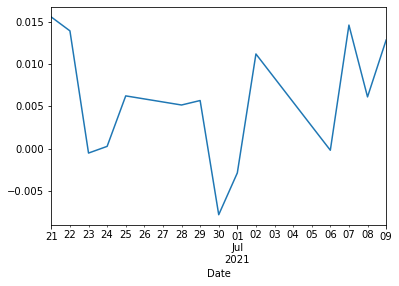

In [64]:
#그래프 그리기
print(df2_graph)
df2_graph.plot()

## 5. 베타값을 적용해서 초과수익이 있는지 확인해보기( S&P500수익률과 비교)

In [65]:
#베타구하기

import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd


tickers = ['^GSPC','AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'META', 'NVDA', 'PEP', 'COST']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 9, 28)


data = pdr.get_data_yahoo(tickers, start, end, interval="m")
#print(data)

data = data['Adj Close']
#print(data)


log_returns = np.log(data/data.shift())
#print(log_returns)


cov = log_returns.cov()
#print(cov)

var = log_returns['^GSPC'].var()
#print(var)


#MSFT베타값
cov.loc['MSFT','^GSPC']/var

1.1952185363369343

In [ ]:
# 베타 1이상일때 주식이 시장보다 변동성이 높지만 더 높은 수익 기대
# 베타 1미만일때 주식이 변동성이 낮고 수익이 더 적을 것으로 예상

#-> COST 1보다 미만

In [67]:
import FinanceDataReader as fdr
import numpy as np
import datetime as dt
import pandas as pd

tickers = ['^GSPC','AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'META', 'NVDA', 'PEP', 'COST']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 9, 28)

data = pdr.get_data_yahoo(tickers, start, end, interval="m")

In [68]:
data=data['Adj Close']

In [70]:
log_returns = np.log(data/data.shift())
log_returns.head()

Symbols,^GSPC,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,PEP,COST
Date,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,0.025757,-0.084562,0.001809,-0.035968,-0.161038,0.101170,0.103962,-0.002752,0.054293,-0.055553,-0.062734
2021-03-01,0.041563,0.008806,0.016783,0.000372,-0.011270,0.019886,0.015477,0.133895,-0.027068,0.090662,0.064848
2021-04-01,0.051097,0.073453,0.067286,0.113920,0.060293,0.131975,0.152790,0.098690,0.117643,0.026931,0.054142
2021-05-01,0.005471,-0.053514,-0.009963,-0.073076,-0.126372,0.001422,0.000597,0.011166,0.079071,0.025883,0.018612


In [71]:
cov = log_returns.cov()

cov

Symbols,^GSPC,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,PEP,COST
Symbols,,,,,,,,,,,
^GSPC,0.002944,0.003489,0.003519,0.004502,0.005141,0.003943,0.003980,0.004020,0.007304,0.001430,0.002793
AAPL,0.003489,0.006731,0.004634,0.006807,0.008621,0.004130,0.004200,0.005362,0.009933,0.002197,0.004925
MSFT,0.003519,0.004634,0.005167,0.005578,0.008210,0.005177,0.005248,0.004311,0.010088,0.001850,0.004078
AMZN,0.004502,0.006807,0.005578,0.010996,0.011520,0.006369,0.006524,0.004035,0.015057,0.000890,0.005493
TSLA,0.005141,0.008621,0.008210,0.011520,0.022552,0.006366,0.006524,0.004507,0.017259,0.002658,0.008210
GOOGL,0.003943,0.004130,0.005177,0.006369,0.006366,0.007060,0.007113,0.004523,0.010720,0.001290,0.003763
GOOG,0.003980,0.004200,0.005248,0.006524,0.006524,0.007113,0.007231,0.004719,0.010961,0.001258,0.003759
META,0.004020,0.005362,0.004311,0.004035,0.004507,0.004523,0.004719,0.014436,0.008066,0.003075,0.003073
NVDA,0.007304,0.009933,0.010088,0.015057,0.017259,0.010720,0.010961,0.008066,0.029534,0.001145,0.008655


In [72]:
var = log_returns['^GSPC'].var()

var

0.002944162348203736

In [73]:
beta = cov.loc['^GSPC']/var

beta
#기간: 21.1.1 ~ 22.9.28 Costco : 0.95

Symbols
^GSPC    1.000000
AAPL     1.185185
MSFT     1.195218
AMZN     1.529180
TSLA     1.746045
GOOGL    1.339197
GOOG     1.351781
META     1.365474
NVDA     2.480964
PEP      0.485629
COST     0.948763
Name: ^GSPC, dtype: float64

## 6. 베타값을 적용해서 초과수익이 있는지 확인해보기( 시장 수익률과 비교)

In [74]:
# 베타값 및 CAPM적용 위한 라이브러리 import
import FinanceDataReader as fdr
import pandas as pd
import statsmodels.api as smf
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff

In [75]:
datasets = ff.get_available_datasets()
df_3_factor = datasets[2]
ds_factors = web.DataReader(df_3_factor,'famafrench', start='2020-01-01', end='2022-10-10')

In [76]:
ds_3_factors = ds_factors[0]
ds_3_factors.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=672, freq=None)

In [77]:
df2_cost_graph

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn
Date,,,,,,,,
2021-06-21,387.649994,380.559998,382.250000,386.799988,1631600.0,383.582153,COST,0.015543
2021-06-22,392.500000,386.559998,387.019989,392.179993,1934800.0,388.917389,COST,0.013909
2021-06-23,393.440002,390.589996,393.000000,391.970001,1538000.0,388.709137,COST,-0.000535
2021-06-24,395.500000,391.799988,393.420013,392.070007,1487300.0,388.808319,COST,0.000255
2021-06-25,394.549988,391.250000,392.970001,394.510010,2056100.0,391.227997,COST,0.006223
2021-06-28,397.420013,393.130005,395.000000,396.540009,1645500.0,393.241119,COST,0.005146
2021-06-29,399.440002,395.470001,396.299988,398.790009,1523600.0,395.472382,COST,0.005674
2021-06-30,400.470001,395.000000,397.970001,395.670013,2031700.0,392.378326,COST,-0.007824
2021-07-01,397.690002,393.880005,396.299988,394.529999,1523400.0,391.247833,COST,-0.002881


In [78]:
# 날짜 형식 일치시켜주기
ds_3_factors = ds_3_factors.to_period(freq = 'D')

In [79]:
final_data = df2_cost_graph.merge(ds_3_factors, how = 'inner', left_index= True, right_index= True)

In [80]:
final_data

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2021-06-21,387.649994,380.559998,382.250000,386.799988,1631600.0,383.582153,COST,0.015543,1.34,0.59,1.06,0.0
2021-06-22,392.500000,386.559998,387.019989,392.179993,1934800.0,388.917389,COST,0.013909,0.58,0.04,-0.43,0.0
2021-06-23,393.440002,390.589996,393.000000,391.970001,1538000.0,388.709137,COST,-0.000535,0.01,0.55,-0.29,0.0
2021-06-24,395.500000,391.799988,393.420013,392.070007,1487300.0,388.808319,COST,0.000255,0.69,0.65,0.23,0.0
2021-06-25,394.549988,391.250000,392.970001,394.510010,2056100.0,391.227997,COST,0.006223,0.31,-0.70,0.43,0.0
2021-06-28,397.420013,393.130005,395.000000,396.540009,1645500.0,393.241119,COST,0.005146,0.22,-0.49,-1.60,0.0
2021-06-29,399.440002,395.470001,396.299988,398.790009,1523600.0,395.472382,COST,0.005674,0.00,-0.25,-0.29,0.0
2021-06-30,400.470001,395.000000,397.970001,395.670013,2031700.0,392.378326,COST,-0.007824,0.07,-0.12,0.76,0.0
2021-07-01,397.690002,393.880005,396.299988,394.529999,1523400.0,391.247833,COST,-0.002881,0.43,0.37,0.42,0.0


## 참고: 베타 구하는 다른 방법(시작), 실행X

In [178]:
df_nasdaq = fdr.StockListing('NASDAQ').iloc[:, :2] # 나스닥
stock_list = df_nasdaq['Symbol'].tolist()
stock_name = df_nasdaq['Name'].tolist()

stock_list_25 = stock_list[0:10]
stock_name_25 = stock_name[0:10]

# 데이터프레임으로 저장
df21 = pd.DataFrame()
for j in stock_list_25:
    df31 = web.get_data_yahoo(j, start='2021-01-01',end='2022-12-31',interval='m')
    df31['Symbol'] = j
    df21 = pd.concat([df21, df31])
    
df21.reset_index().merge(df_nasdaq, how='left')

#Period형태로 Date
df21 = df21.to_period(freq='M')
df21.info()

#수익률 계산 pct_change 메쏘드, dropna 결측치 제거
df21['rtn'] = df21['Adj Close'].pct_change()
df21 = df21.dropna()


datasets = ff.get_available_datasets()
df_3_factor1 = datasets[0]

ds_factors1 = web.DataReader(df_3_factor1,'famafrench', start='2021-01-01', end='2022-12-31')
# save FF3 to ds_3_factors
ds_3_factors1 = ds_factors1[0]
ds_3_factors1.index

final_data1 = df21.merge(ds_3_factors1, how = 'inner', left_index= True, right_index= True)

final_data1.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
final_data1['mkt_excess'] = final_data1['mkt_excess']/100
final_data1['SMB'] = final_data1['SMB']/100
final_data1['HML'] = final_data1['HML']/100
final_data1['RF'] = final_data1['RF']/100
final_data1['ret_i_excess'] = final_data1['rtn'] - final_data1['RF']

# 베타값 구하기 함수, option 1: 일반 베타값, option 2: 파마프렌치 반영 베타값, params[1] => 베타값
def beta(code, option):
    
    #mkt_excess, smb, hml => 독립변수, ret_i_excess => 종속변수
    if option == 1:
        model = smf.formula.ols(formula = "ret_i_excess ~ mkt_excess ", data = final_data1[final_data1['Symbol']==code]).fit()
        beta = model.params[1]
    else:
        model = smf.formula.ols(formula = "ret_i_excess ~ mkt_excess + SMB + HML", data = final_data1[final_data1['Symbol']==code]).fit()
        beta = model.params[1]
        
    return beta

# 코드 및 베타값 
symbol_name = []
betas =[]
for i in stock_list_25:
    betas.append(beta(i, 1))
    symbol_name.append(i)

result = pd.DataFrame(betas, symbol_name)
result = result.reset_index()
result.columns = ['Codes', 'BetaValue']
    
# 코드 및 베타값 파마
f_symbol_name = []
f_betas =[]
for i in stock_list_25:
    f_betas.append(beta(i, 2))
    f_symbol_name.append(i)

f_result = pd.DataFrame(f_betas, f_symbol_name)
f_result = f_result.reset_index()
f_result.columns = ['Codes', 'BetaValue']

100%|██████████| 4606/4606 [00:13<00:00, 343.83it/s]


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 575 entries, 2021-01 to 2022-10
Freq: M
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       575 non-null    float64
 1   Low        575 non-null    float64
 2   Open       575 non-null    float64
 3   Close      575 non-null    float64
 4   Volume     575 non-null    float64
 5   Adj Close  575 non-null    float64
 6   Symbol     575 non-null    object 
dtypes: float64(6), object(1)
memory usage: 35.9+ KB


,Codes,BetaValue
0,AAPL,0.928937
1,MSFT,1.268192
2,AMZN,1.486171
3,TSLA,2.268386
4,GOOGL,1.134591
5,GOOG,1.290097
6,META,1.575136
7,NVDA,2.292167
8,PEP,0.414132
9,COST,0.959704


In [179]:
result

,Codes,BetaValue
0,AAPL,1.167426
1,MSFT,1.197366
2,AMZN,1.732917
3,TSLA,2.222422
4,GOOGL,1.374513
5,GOOG,1.365756
6,META,1.050088
7,NVDA,2.507009
8,PEP,0.396122
9,COST,0.869324


## 베타 구하는 다른 방법 (끝) 실행X

## 6. 초과수익률 구하기

In [82]:
# costco beta, 위에서 구한 베타값 적용하기
beta = 0.948763
#beta = 0.869324

In [83]:
final_data['exret'] = final_data['rtn'] - final_data['RF']/100

In [84]:
# costco beta = 0.948763
final_data['ab_ret'] = final_data['exret'] - (final_data['Mkt-RF']/100) * beta

In [85]:
mean_ab_ret=final_data['ab_ret'].mean()

In [86]:
mean_ab_ret

0.002725913487282461

In [87]:
final_data

,High,Low,Open,Close,Volume,Adj Close,Symbol,rtn,Mkt-RF,SMB,HML,RF,exret,ab_ret
Date,,,,,,,,,,,,,,
2021-06-21,387.649994,380.559998,382.250000,386.799988,1631600.0,383.582153,COST,0.015543,1.34,0.59,1.06,0.0,0.015543,0.002830
2021-06-22,392.500000,386.559998,387.019989,392.179993,1934800.0,388.917389,COST,0.013909,0.58,0.04,-0.43,0.0,0.013909,0.008406
2021-06-23,393.440002,390.589996,393.000000,391.970001,1538000.0,388.709137,COST,-0.000535,0.01,0.55,-0.29,0.0,-0.000535,-0.000630
2021-06-24,395.500000,391.799988,393.420013,392.070007,1487300.0,388.808319,COST,0.000255,0.69,0.65,0.23,0.0,0.000255,-0.006291
2021-06-25,394.549988,391.250000,392.970001,394.510010,2056100.0,391.227997,COST,0.006223,0.31,-0.70,0.43,0.0,0.006223,0.003282
2021-06-28,397.420013,393.130005,395.000000,396.540009,1645500.0,393.241119,COST,0.005146,0.22,-0.49,-1.60,0.0,0.005146,0.003058
2021-06-29,399.440002,395.470001,396.299988,398.790009,1523600.0,395.472382,COST,0.005674,0.00,-0.25,-0.29,0.0,0.005674,0.005674
2021-06-30,400.470001,395.000000,397.970001,395.670013,2031700.0,392.378326,COST,-0.007824,0.07,-0.12,0.76,0.0,-0.007824,-0.008488
2021-07-01,397.690002,393.880005,396.299988,394.529999,1523400.0,391.247833,COST,-0.002881,0.43,0.37,0.42,0.0,-0.002881,-0.006961


In [88]:
final_data['CAR'] = (final_data['ab_ret'] + 1).cumprod() - 1 #복리계산용 +1, -1

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
final_data['CAR']

Date
2021-06-21    0.002830
2021-06-22    0.011260
2021-06-23    0.010622
2021-06-24    0.004264
2021-06-25    0.007560
2021-06-28    0.010642
2021-06-29    0.016376
2021-06-30    0.007749
2021-07-01    0.000734
2021-07-02    0.006604
2021-07-06    0.009076
2021-07-07    0.022938
2021-07-08    0.037528
2021-07-09    0.038526
Freq: D, Name: CAR, dtype: float64

Date
2021-06-21    0.002830
2021-06-22    0.011260
2021-06-23    0.010622
2021-06-24    0.004264
2021-06-25    0.007560
2021-06-28    0.010642
2021-06-29    0.016376
2021-06-30    0.007749
2021-07-01    0.000734
2021-07-02    0.006604
2021-07-06    0.009076
2021-07-07    0.022938
2021-07-08    0.037528
2021-07-09    0.038526
Freq: D, Name: CAR, dtype: float64


<AxesSubplot:xlabel='Date'>

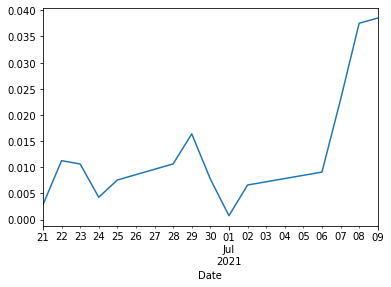

In [91]:
print(final_data['CAR'])
final_data['CAR'].plot()